In [32]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt

In [33]:
import time
# Memulai waktu komputasi
start_time = time.time()

jawaban_siswa_df = pd.read_excel('Data Jawaban Siswa.xlsx') 
kunci_jawaban_df = pd.read_excel('Data Kunci Jawaban.xlsx')
jawaban_siswa_df

,No.,Nama,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,Nilai
0,1,ADE RISMA ALFAREZA,"Memiliki ciri-ciri hidup seperti bernapas, ber...",Faktor-faktor yang berpengaruh yaitu kemampuan...,Metamorfosis adalah proses perubahan struktur ...,Embrio mendapatkan makanan dari induknya lewat...,Karena paru-paru juga mengeluarkan cairan meta...,Adaptasi adalah kemampuan diri untuk dapat men...,Migrasi yaitu proses perpindahan dari wilayah ...,Bioteknologi merupakan teknologi yang mengguna...,Otot yang bekerja sama atau otot yang berkontr...,Berfungsi untuk mengikat oksigen untuk diedark...,87
1,2,AISYAH RAMADHANI,Suatu makhluk hidup dikatakan makhluk hidup ap...,Kelangsungan hidup dipengaruhi beberapa faktor...,Metamorfosis adalah perubahan struktur tubuh p...,Dari plasenta yang bersumber dari induknya yan...,Karena paru-paru juga mengeluarkan komponen si...,Adaptasi adalah proses menyesuaikan diri pada ...,Migrasi adalah proses perpindahan dari wilayah...,Pemanfaatan makhluk hidup yang dihasilkan untu...,"Otot sinergis adalah otot yang bekerja sama, o...",Mengikat oksigen untuk diedarkan ke seluruh tu...,83
2,3,PEGGY INDRA WARDANI,Dikatakan sebagai makhluk hidup jika mempunyai...,Faktor-faktor yang mempengaruhi kelangsungan h...,"Telur katak menetas menjadi kecebong, kaki kec...",Embrio memperoleh makanan berasal dari apa yan...,Karena paru-paru mengeluarkan karbon dioksida ...,Adaptasi adalah kemampuan makhluk hidup untuk ...,Migrasi adalah proses perpindahan dari wilayah...,Bioteknologi adalah suatu cara menggunakan mak...,Otot yang saling bekerja sama.,Mengikat oksigen untuk diedarkan ke seluruh tu...,69
3,4,MYELSYA PUTRI FATHURYANTI,Makhluk hidup dapat disebut makhluk hidup jika...,"Berkembang biak, adaptasi, makan, lingkungan a...",Metamorfosis adalah perubahan bentuk dan struk...,Embrio memperoleh makanan dari induknya melalu...,Karena paru-paru mengeluarkan bekas metabolism...,Adaptasi adalah kemampuan makhluk hidup untuk ...,Migrasi adalah perpindahan dari wilayah yang k...,Bioteknologi adalah cabang ilmu biologi yang m...,Otot yang bekerja sama dengan cara berkontraks...,Mengikat oksigen dan karbon dioksida,75
4,5,MOH. MA'RUF ISLAMUDDIN,Bergerak - peka - tumbuh - makan - berkembang...,Faktor yang mempengaruhi adalah kemampuan bera...,Metamorfosis: proses perubahan struktur dan be...,Cara embrio memperoleh makanan yaitu dari indu...,Karena paru-paru mengeluarkan karbon dioksida,Adaptasi penyesuaian diri karena untuk mempert...,Migrasi: proses perpindahan dari suatu wilayah...,Bioteknologi adalah suatu teknologi yang meman...,"Otot-otot yang saling bekerja sama, otot yang ...",Hemoglobin memiliki fungsi untuk mengikat oksi...,77
5,6,ARIK PRATAMA,Manusia dikatakan sebagai makhluk hidup jika m...,Faktor-faktor yang berpengaruh dalam kelangsun...,Metamorfosis adalah struktur siklus hidup pada...,Embrio memperoleh makanan dari plasenta yang m...,Karena paru-paru mengeluarkan sisa metabolisme...,Adaptasi adalah makhluk hidup yang menyesuaika...,Migrasi adalah proses perpindahan dari lingkun...,Suatu teknologi yang memanfaatkan makanan makh...,Otot sinergis adalah otot yang bekerja sama. O...,Mengikat oksigen untuk diedarkan ke seluruh tu...,78
6,7,AMRUL FIRDAUS AL HAKIKY,Suatu makhluk hidup dapat dikatakan sebagai ma...,"Kemampuan habituasi, seleksi alam, dan nilai p...",Metamorfosis yaitu suatu proses perubahan bent...,Embrio memperoleh makanan berasal dari indukny...,Karena paru-paru mengeluarkan sisa metabolisme...,Adaptasi setiap makhluk hidup sangat penting k...,Yaitu pindahnya suatu makhluk hidup pada lingk...,Bioteknologi merupakan suatu teknologi yang me...,Suatu otot yang bekerja sama dengan seksama.,Mengikat oksigen untuk diedarkan ke seluruh tu...,74
7,8,DITO ZULFA RAHMAN,Suatu makhluk hidup dikatakan sebagai makhluk ...,Faktor yang berpengaruh adalah seperti berkemb...,Adalah proses perubahan struktur dan bentuk tu...,Dengan cara melalui plasenta.,Karena paru-paru mengeluarkan metabolisme.,Adaptasi yaitu penyesuaian suatu makhluk hidup.

In [34]:
kunci_jawaban_df

,Nomor,Soal,Kunci,Bobot
0,1,Apa syarat suatu makhluk hidup dikatakan sebag...,Suatu makhluk hidup dikatakan sebagai makhluk ...,10
1,2,Jelaskan perbedaan pencernaan secara kimiawi d...,Faktor-faktor yang mempengaruhi kelangsungan h...,10
2,3,Amfibi mengalami metamorfosis dalam siklus hid...,Metamorfosis adalah proses perubahan struktur ...,10
3,4,Apa yang dimaksud dengan ekosistem buatan dan ...,Embrio memperoleh suplai makanan dari ibunya m...,10
4,5,Apa perbedaan komunitas dengan ekosistem?,Karena paru-paru juga mengeluarkan sisa metabo...,10
5,6,Jelaskan pengertian dari adapatasi? Mengapa se...,Adaptasi adalah kemampuan makhluk hidup untuk ...,10
6,7,Beberapa jenis hewan melakukan migrasi untuk m...,Migrasi adalah proses perpindahan dari daerah ...,10
7,8,Jelaskan perbedaan antara sendi peluru dan sen...,Bioteknologi merupakan suatu teknologi yang me...,10
8,9,Jelaskan kerja otos secara sinergis?,Otot sinergis merupakan otot yang saling beker...,10
9,10,Apakah perbedaan antara reseptor dengan efektor?,Hemoglobin berfungsi mengikat oksigen untuk di...,10


In [35]:
def preprocess(text):
    if not isinstance(text, str): #memastikan bahwa input yang diberikan berupa string
        return ''
    
    #case folding
    text = text.lower() #mengubah ke bentuk huruf kecil
    text = text.translate(str.maketrans('', '', string.punctuation)) #menghapus tanda baca
    text = re.sub(r'\d+', '', text) #menghapus angka
    
    #tokenization
    tokens = word_tokenize(text)
    
    #stopword removal 
    stopword_remover = StopWordRemoverFactory().get_stop_words()
    tokens = [word for word in tokens if word not in stopword_remover]
    
    #stemming
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

for col in range(1, 11):
    jawaban_siswa_df[f'preprocessed_J{col}'] = jawaban_siswa_df[f'J{col}'].apply(preprocess)
kunci_jawaban_df['preprocessed'] = kunci_jawaban_df['Kunci'].apply(preprocess)

In [36]:
# Menghitung tf-idf
def tfidf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X

for col in range(1, 11):
        jawaban_siswa_col = jawaban_siswa_df[f'preprocessed_J{col}']
        tfidf_matrix_siswa = tfidf(jawaban_siswa_col)
tfidf_matrix_kunci = tfidf(kunci_jawaban_df['preprocessed'])
print (tfidf_matrix_kunci)

  (0, 23)	0.216788205861114
  (0, 5)	0.216788205861114
  (0, 66)	0.216788205861114
  (0, 0)	0.1433466072219699
  (0, 9)	0.184289780747777
  (0, 44)	0.16123178117872472
  (0, 105)	0.184289780747777
  (0, 93)	0.184289780747777
  (0, 109)	0.216788205861114
  (0, 43)	0.16123178117872472
  (0, 56)	0.184289780747777
  (0, 82)	0.216788205861114
  (0, 74)	0.216788205861114
  (0, 24)	0.216788205861114
  (0, 67)	0.184289780747777
  (0, 11)	0.216788205861114
  (0, 81)	0.216788205861114
  (0, 41)	0.216788205861114
  (0, 28)	0.4300398216659097
  (0, 57)	0.2866932144439398
  (0, 95)	0.1433466072219699
  (1, 103)	0.300705862482641
  (1, 2)	0.300705862482641
  (1, 89)	0.300705862482641
  (1, 58)	0.255627455591381
  :	:
  (7, 85)	0.23160974424928585
  (7, 10)	0.27245276820027803
  (7, 95)	0.36030723899033956
  (8, 7)	0.2744541685621539
  (8, 83)	0.2744541685621539
  (8, 47)	0.2744541685621539
  (8, 72)	0.2744541685621539
  (8, 87)	0.2744541685621539
  (8, 45)	0.2744541685621539
  (8, 86)	0.274454168562

In [37]:
# Menghitung dice similarity
def dice_similarity(str1, str2):
    # tokenization
    str1_tokens = set(word_tokenize(str1))
    str2_tokens = set(word_tokenize(str2))
    
    # similarity calculation
    intersection = len(str1_tokens.intersection(str2_tokens))
    dice_sim = 2 * intersection / (len(str1_tokens) + len(str2_tokens))
    
    return dice_sim

In [38]:
similarity_scores = []
for col in range(1, 11):
    jawaban_siswa_col = jawaban_siswa_df[f'preprocessed_J{col}']
    col_similarity_scores = []
    for i, jawaban_siswa in enumerate(jawaban_siswa_col):
        dice_scores = []
        for j, kunci_jawaban in enumerate(kunci_jawaban_df['preprocessed']):
            dice_scores.append(dice_similarity(jawaban_siswa, kunci_jawaban))
        col_similarity_scores.append(max(dice_scores))
    
    similarity_scores.append(col_similarity_scores)

similarity_scores_menggunakan_df = pd.DataFrame(similarity_scores).transpose()
similarity_scores_menggunakan_df.columns = [f'similarity_score_J{col}' for col in range(1, 11)]

In [39]:
def calculate_numeric_grade(similarity_score):
    x = similarity_score
    if x >= 0 and x <= 0.05:
      return 5
    elif x >= 0.05 and x <= 0.1:
      return 10
    elif x >= 0.1 and x <= 0.15:
      return 15
    elif x >= 0.15 and x <= 0.2:
      return 20
    elif x >= 0.2 and x <= 0.25:
      return 25
    elif x >= 0.25 and x <= 0.3:
      return 30
    elif x >= 0.3 and x <= 0.35:
      return 35
    elif x >= 0.35 and x <= 0.4:
      return 40
    elif x >= 0.4 and x <= 0.45:
      return 45
    elif x >= 0.45 and x <= 0.5:
      return 50
    elif x >= 0.5 and x <= 0.55:
      return 55
    elif x >= 0.55 and x <= 0.6:
      return 60
    elif x >= 0.6 and x <= 0.65:
      return 65
    elif x >= 0.65 and x <= 0.7:
      return 70
    elif x >= 0.7 and x <= 0.75:
      return 75
    elif x >= 0.75 and x <= 0.8:
      return 8
    elif x >= 0.8 and x <= 0.85:
      return 85
    elif x >= 0.85 and x <= 0.9:
      return 9
    elif x >= 0.9 and x <= 0.95:
      return 95
    elif x >= 0.95 and x <= 1:
      return 100

for col in range(1, 11):
    col_name = f'preprocessed_J{col}'
    jawaban_siswa_df[f'similarity_J{col}'] = jawaban_siswa_df[col_name].apply(
        lambda x: dice_similarity(x, kunci_jawaban_df.loc[col-1, 'preprocessed']))
    jawaban_siswa_df[f'score_J{col}'] = jawaban_siswa_df[f'similarity_J{col}'].apply(calculate_numeric_grade)

In [40]:
similarity_scores_menggunakan_df['total_similarity'] = similarity_scores_menggunakan_df.iloc[:, 0:10].sum(axis=1)
similarity_scores_menggunakan_df['average_similarity'] = similarity_scores_menggunakan_df['total_similarity'] / 10
similarity_scores_menggunakan_df

,similarity_score_J1,similarity_score_J2,similarity_score_J3,similarity_score_J4,similarity_score_J5,similarity_score_J6,similarity_score_J7,similarity_score_J8,similarity_score_J9,similarity_score_J10,total_similarity,average_similarity
0,0.764706,0.818182,0.807018,0.375000,0.777778,0.761905,0.666667,0.666667,0.705882,0.727273,7.071076,0.707108
1,0.451613,0.750000,0.727273,0.266667,0.842105,0.608696,0.800000,0.352941,0.705882,0.700000,6.205177,0.620518
2,0.625000,0.923077,0.693878,0.555556,0.750000,0.761905,0.923077,0.526316,0.533333,0.631579,6.923720,0.692372
3,0.647059,0.315789,0.363636,0.625000,0.800000,0.818182,0.750000,0.636364,0.588235,0.285714,5.829980,0.582998
4,0.645161,0.727273,0.807018,0.555556,0.571429,0.631579,0.695652,0.500000,0.842105,0.631579,6.607351,0.660735
5,0.571429,0.769231,0.603774,0.470588,0.666667,0.761905,0.800000,0.526316,0.900000,0.625000,6.694908,0.669491
6,0.727273,0.315789,0.766667,0.705882,1.000000,0.538462,0.272727,0.700000,0.375000,0.625000,6.026800,0.602680
7,0.482759,0.571429,0.800000,0.307692,0.461538,0.476190,0.526316,0.588235,0.470588,0.421053,5.105800,0.510580
8,0.647059,0.720000,0.341463,0.444444,0.555556,0.466667,0.160000,0.210526,0.454545,0.400000,4.400261,0.440026
9,0.756757,0.880000,0.375000,0.705882,0.571429,0.592593,0.384615,0.470588,0.555556,0.500000,5.792419,0.579242


In [41]:
jawaban_siswa_df['similarity_score'] = similarity_scores_menggunakan_df['average_similarity']
jawaban_siswa_df['score'] = jawaban_siswa_df['similarity_score'].apply(calculate_numeric_grade)
jawaban_siswa_df[['Nama', 'Nilai', 'similarity_score', 'score']]

,Nama,Nilai,similarity_score,score
0,ADE RISMA ALFAREZA,87,0.707108,75
1,AISYAH RAMADHANI,83,0.620518,65
2,PEGGY INDRA WARDANI,69,0.692372,70
3,MYELSYA PUTRI FATHURYANTI,75,0.582998,60
4,MOH. MA'RUF ISLAMUDDIN,77,0.660735,70
5,ARIK PRATAMA,78,0.669491,70
6,AMRUL FIRDAUS AL HAKIKY,74,0.602680,65
7,DITO ZULFA RAHMAN,50,0.510580,55
8,NUR AFIDA,60,0.440026,45
9,BERLYA WIJAYA WATI,73,0.579242,60


In [42]:
import math

nilai_siswa = jawaban_siswa_df['score']
nilai_asli = jawaban_siswa_df['Nilai']
jumlah_siswa = len(jawaban_siswa_df)
nilai_maksimal = 100

error = 0
for i in range(jumlah_siswa):
    error += (nilai_siswa[i] - nilai_asli[i]) ** 2
error_rate = math.sqrt(error / jumlah_siswa) / nilai_maksimal
accurate = 1-error_rate
percent = accurate*100

print("Error rate:", error_rate)
print(f"Akurasi : {percent:.2f}%")

Error rate: 0.15288557812952797
Akurasi : 84.71%


In [43]:
end_time = time.time()

# Menghitung durasi waktu komputasi
duration = end_time - start_time

# Menampilkan durasi waktu komputasi
print(f"Waktu komputasi: {duration} detik")

Waktu komputasi: 106.02054166793823 detik


### Menggunakan Query Expansion

In [44]:
import time
# Memulai waktu komputasi
start_time = time.time()

jawaban_siswa_df2 = pd.read_excel('Data Jawaban Siswa.xlsx') 
kunci_jawaban_df2 = pd.read_excel('Data Kunci Jawaban.xlsx')

In [45]:
for col in range(1, 11):
    jawaban_siswa_df2[f'prePro_J{col}'] = jawaban_siswa_df2[f'J{col}'].apply(preprocess)
kunci_jawaban_df2['prePro'] = kunci_jawaban_df2['Kunci'].apply(preprocess)

In [46]:
def load(filename):
    with open(filename) as data_file:
        data = json.load(data_file)
    return data

mydict = load('dictIPA.json')

def get_synonyms(word):
    if word in mydict.keys():
        return mydict[word]['sinonim']
    else:
        return []

def query_expansion(kunci_jawaban, jawaban_siswa):
    expanded_kunci_jawaban = []
    kunci_jawaban = nltk.word_tokenize(kunci_jawaban)
    jawaban_siswa = nltk.word_tokenize(jawaban_siswa)
    for kunci in kunci_jawaban:
        sinonim = get_synonyms(kunci)
        found = False
        for sin in sinonim:
            if sin in jawaban_siswa:
                expanded_kunci_jawaban.append(sin)       
                found = True
                break
        if not found:
            expanded_kunci_jawaban.append(kunci)
    return expanded_kunci_jawaban

In [47]:
dataNew = pd.DataFrame(columns=['No', 'Siswa', 'KunciJawaban','PreJawabanSiswa','expended'])
dataNew

,No,Siswa,KunciJawaban,PreJawabanSiswa,expended


In [48]:
kunci_jawaban_qe2 = kunci_jawaban_df2['prePro']
kunci_jawaban_qe3 = kunci_jawaban_df2['Kunci']
nama_siswa=jawaban_siswa_df2['Nama']
i=0
j=0
for col in range(0,50):
  for row in range(0,10):
    jawaban_siswa_qe2 = jawaban_siswa_df2[f'prePro_J{row+1}']
    expended =' '.join(query_expansion(kunci_jawaban_qe2[row], jawaban_siswa_qe2[col]))
    dataNew.loc[j]=[j+1,nama_siswa[col],kunci_jawaban_qe3[row],jawaban_siswa_qe2[col],expended]
    j+=1
dataNew

,No,Siswa,KunciJawaban,PreJawabanSiswa,expended
0,1,ADE RISMA ALFAREZA,Suatu makhluk hidup dikatakan sebagai makhluk ...,milik ciriciri hidup napas gerak peka rangsang...,suatu makhluk tumbuh kata makhluk tumbuh punya...
1,2,ADE RISMA ALFAREZA,Faktor-faktor yang mempengaruhi kelangsungan h...,faktorfaktor pengaruh mampu adaptasi seleksi a...,faktorfaktor pengaruh langsung hidup suatu mak...
2,3,ADE RISMA ALFAREZA,Metamorfosis adalah proses perubahan struktur ...,metamorfosis proses ubah struktur bentuk tubuh...,metamorfosis proses ubah bentuk struktur tubuh...
3,4,ADE RISMA ALFAREZA,Embrio memperoleh suplai makanan dari ibunya m...,embrio dapat makan induk lewat plasenta,embrio oleh suplai makan induk lalu plasenta m...
4,5,ADE RISMA ALFAREZA,Karena paru-paru juga mengeluarkan sisa metabo...,paruparu keluar cair metabolisme karbon dioksi...,paruparu keluar sisa metabolisme tubuh upa kar...
...,...,...,...,...,...
495,496,GITA NUR ANISA,Adaptasi adalah kemampuan makhluk hidup untuk ...,adaptasi cara organisme atas tekan lingkung se...,adaptasi mampu makhluk hidup sesuai diri lingk...
496,497,GITA NUR ANISA,Migrasi adalah proses perpindahan dari daerah ...,migrasi pindah lingkung tempat tinggal hewan m...,migrasi proses pindah tempat kurang masuk temp...
497,498,GITA NUR ANISA,Bioteknologi merupakan suatu teknologi yang me...,bioteknologi manfaat makhluk hidup hasil baran...,bioteknologi rupa suatu teknologi guna organis...
498,499,GITA NUR ANISA,Otot sinergis merupakan otot yang saling beker...,kerja cara tengadah telungkup telapak tangan,otot sinergis rupa otot saling kerja sama otot...


In [49]:
def tfidf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X

tfidf_matrix_kunci = tfidf(dataNew['expended'])
tfidf_matrix_siswa = tfidf(dataNew['PreJawabanSiswa'])
print (tfidf_matrix_kunci)

  (0, 36)	0.17858057164378124
  (0, 11)	0.17751043226455113
  (0, 87)	0.17751043226455113
  (0, 1)	0.10876142116561743
  (0, 63)	0.237704382147761
  (0, 43)	0.10531087020727155
  (0, 120)	0.1444664726764496
  (0, 140)	0.17751043226455113
  (0, 77)	0.14058499039345673
  (0, 106)	0.17751043226455113
  (0, 96)	0.18308653652887816
  (0, 37)	0.17751043226455113
  (0, 88)	0.14058499039345673
  (0, 22)	0.17751043226455113
  (0, 105)	0.17751043226455113
  (0, 58)	0.17751043226455113
  (0, 134)	0.7017268158356965
  (0, 78)	0.19851248316963865
  (0, 122)	0.10420796921885465
  (1, 132)	0.3021423310606469
  (1, 4)	0.3116334754354749
  (1, 116)	0.3021423310606469
  (1, 79)	0.240206413306105
  (1, 72)	0.3021423310606469
  (1, 97)	0.30582212189338925
  :	:
  (497, 38)	0.4904522297098413
  (497, 78)	0.15464467249101532
  (497, 122)	0.3247192723297376
  (498, 15)	0.2766641541104031
  (498, 107)	0.2766641541104031
  (498, 67)	0.2766641541104031
  (498, 94)	0.2766641541104031
  (498, 112)	0.2766641541104

In [50]:
#menghitung nilai similarity
def dice_similarity(str1, str2):
    # tokenization
    str1_tokens = set(word_tokenize(str1))
    str2_tokens = set(word_tokenize(str2))
    
    # similarity calculation
    intersection = len(str1_tokens.intersection(str2_tokens))
    dice_sim = 2 * intersection / (len(str1_tokens) + len(str2_tokens))
    
    return dice_sim

In [51]:
similarity_scores = []
for i, jawaban_siswa in enumerate(dataNew['PreJawabanSiswa']):
    dice_scores = []
    for j, kunci_jawaban in enumerate(dataNew['expended']):
        dice_scores.append(dice_similarity(jawaban_siswa, kunci_jawaban))
    similarity_scores.append(max(dice_scores))
    
dataNew['similarity_score'] = pd.DataFrame(similarity_scores)

In [52]:
dataNew2 = pd.DataFrame(columns=['No', 'Siswa', 'Scorer'])
pd.set_option('mode.chained_assignment', None)

In [53]:
data_similarity=dataNew['similarity_score']
nama_siswa=dataNew['Siswa']
j=0
k=1
tempData=0
for i in range (len(dataNew)):
  tempData+=data_similarity[i]
  if(k%10==0):
    dataNew2.loc[j]=[j+1,nama_siswa[k-2],tempData/10]
    tempData=0
    j+=1
  k+=1
dataNew2

,No,Siswa,Scorer
0,1,ADE RISMA ALFAREZA,0.758422
1,2,AISYAH RAMADHANI,0.664710
2,3,PEGGY INDRA WARDANI,0.743040
3,4,MYELSYA PUTRI FATHURYANTI,0.632527
4,5,MOH. MA'RUF ISLAMUDDIN,0.692567
5,6,ARIK PRATAMA,0.705708
6,7,AMRUL FIRDAUS AL HAKIKY,0.643301
7,8,DITO ZULFA RAHMAN,0.550641
8,9,NUR AFIDA,0.500421
9,10,BERLYA WIJAYA WATI,0.640289


In [54]:
def calculate_numeric_grade(x):
    if x >= 0 and x <= 0.05:
      return 5
    elif x >= 0.05 and x <= 0.1:
      return 10
    elif x >= 0.1 and x <= 0.15:
      return 15
    elif x >= 0.15 and x <= 0.2:
      return 20
    elif x >= 0.2 and x <= 0.25:
      return 25
    elif x >= 0.25 and x <= 0.3:
      return 30
    elif x >= 0.3 and x <= 0.35:
      return 35
    elif x >= 0.35 and x <= 0.4:
      return 40
    elif x >= 0.4 and x <= 0.45:
      return 45
    elif x >= 0.45 and x <= 0.5:
      return 50
    elif x >= 0.5 and x <= 0.55:
      return 55
    elif x >= 0.55 and x <= 0.6:
      return 60
    elif x >= 0.6 and x <= 0.65:
      return 65
    elif x >= 0.65 and x <= 0.7:
      return 70
    elif x >= 0.7 and x <= 0.75:
      return 75
    elif x >= 0.75 and x <= 0.8:
      return 80
    elif x >= 0.8 and x <= 0.85:
      return 85
    elif x >= 0.85 and x <= 0.9:
      return 90
    elif x >= 0.9 and x <= 0.95:
      return 95
    elif x >= 0.95 and x <= 1:
      return 100

In [55]:
dataSim=dataNew2['Scorer']
dataNew2['hasil_siswa']=0
data_total=dataNew2['hasil_siswa']
for col in range(len(dataNew2)):
  data_total[col]=calculate_numeric_grade(dataSim[col])

dataNew2

,No,Siswa,Scorer,hasil_siswa
0,1,ADE RISMA ALFAREZA,0.758422,80
1,2,AISYAH RAMADHANI,0.664710,70
2,3,PEGGY INDRA WARDANI,0.743040,75
3,4,MYELSYA PUTRI FATHURYANTI,0.632527,65
4,5,MOH. MA'RUF ISLAMUDDIN,0.692567,70
5,6,ARIK PRATAMA,0.705708,75
6,7,AMRUL FIRDAUS AL HAKIKY,0.643301,65
7,8,DITO ZULFA RAHMAN,0.550641,60
8,9,NUR AFIDA,0.500421,55
9,10,BERLYA WIJAYA WATI,0.640289,65


In [56]:
import math

nilai_siswa = dataNew2['hasil_siswa']
nilai_asli = jawaban_siswa_df2['Nilai']
jumlah_siswa = len(dataNew2)
nilai_maksimal = 100

error = 0
for i in range(jumlah_siswa):
    error += (nilai_siswa[i] - nilai_asli[i]) ** 2
error_rate = math.sqrt(error / jumlah_siswa) / nilai_maksimal
accurate2 = 1-error_rate
percent2 = accurate2*100

print("Error rate:", error_rate)
print(f"Akurasi : {percent2:.2f}%")

Error rate: 0.11871815362445627
Akurasi : 88.13%


In [57]:
end_time = time.time()

# Menghitung durasi waktu komputasi
duration = end_time - start_time

# Menampilkan durasi waktu komputasi
print(f"Waktu komputasi: {duration} detik")

Waktu komputasi: 214.5866892337799 detik


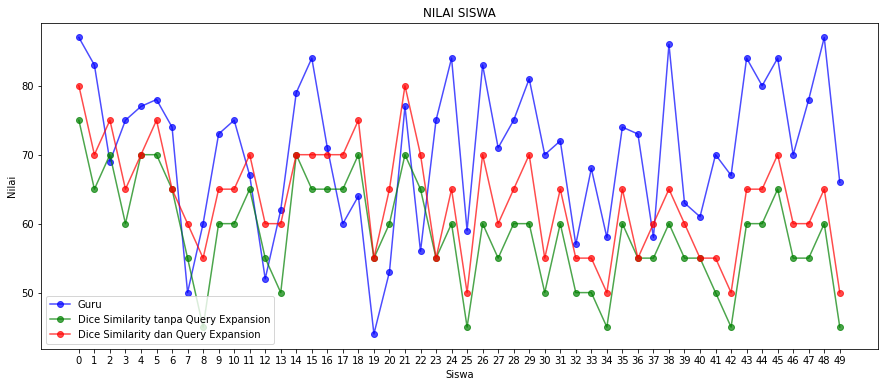

In [58]:
plt.figure(figsize=(15, 6))
plt.title("NILAI SISWA")
plt.plot(range(0,50), jawaban_siswa_df.loc[:,"Nilai"], alpha=0.7, marker="o", color="Blue", label="Guru")
plt.plot(range(0,50), jawaban_siswa_df.loc[:,"score"], alpha=0.7, marker="o", color="Green", label="Dice Similarity tanpa Query Expansion")
plt.plot(range(0,50), dataNew2.loc[:,"hasil_siswa"], alpha=0.7, marker="o", color="Red", label="Dice Similarity dan Query Expansion")
plt.xlabel("Siswa")
plt.ylabel('Nilai')
plt.xticks(range(0,50), range(0,50))
plt.legend()
plt.show()

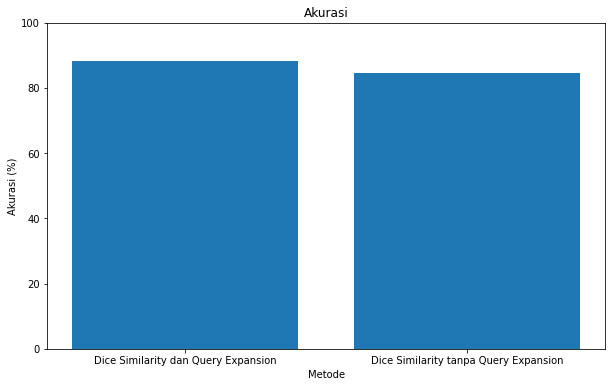

In [59]:
plt.figure(figsize=(10, 6))
# Data
labels = ['Dice Similarity dan Query Expansion', 'Dice Similarity tanpa Query Expansion']
accuracies = [percent2, percent]

# Plot
plt.bar(labels, accuracies)
plt.title('Akurasi')
plt.xlabel('Metode')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100
plt.xticks(labels, labels, ha='center')
plt.show()